# Whats inside the downloaded data=>

## Inspecting the nc files=>

In [1]:
import xarray as xr

# Path to one downloaded file
file_path = "/home/nilay/SSD Data Downloads/ERA5 Hourly 2025 October/ERA5_PL_2025_10_01.nc"

ds = xr.open_dataset(file_path)

print(ds)              # Dataset summary
print("\nVariables:")
print(list(ds.data_vars))

print("\nDimensions:")
print(ds.dims)

print("\nCoordinates:")
print(list(ds.coords))


<xarray.Dataset> Size: 4GB
Dimensions:         (valid_time: 24, pressure_level: 8, latitude: 721,
                     longitude: 1440)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 192B 2025-10-01 ... 2025-10-0...
  * pressure_level  (pressure_level) float64 64B 1e+03 925.0 ... 400.0 300.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    number          int64 8B ...
    expver          (valid_time) <U4 384B ...
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 797MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 797MB ...
    w               (valid_time, pressure_level, latitude, longitude) float32 797MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 797MB ...
    z               (valid_time, pressure_level, latitude, longitude) float32 797MB ...
At

In [6]:
pip install netCDF4


Note: you may need to restart the kernel to use updated packages.


In [14]:
import zipfile
import os

file_path = "/home/nilay/SSD Data Downloads/ERA5 Hourly 2025 October/ERA5_SL_2025_10_01.nc"
folder = os.path.dirname(file_path)

with zipfile.ZipFile(file_path, 'r') as z:
    z.extractall(folder)

os.remove(file_path)

print("✅ Extracted ERA5 file")


✅ Extracted ERA5 file


# Unzipping the total precipitation files =>

In [18]:
import os
import glob
import zipfile
import shutil

# ================================
# USER PATHS
# ================================

input_dir  = "/home/nilay/SSD Data Downloads/ERA5 Hourly 2025 October"
output_dir = "/home/nilay/SSD Data Downloads/ERA5 October Hourly Unziped"

os.makedirs(output_dir, exist_ok=True)

# ================================
# PROCESS FILES
# ================================

files = sorted(glob.glob(os.path.join(input_dir, "*.nc")))

print(f"Found {len(files)} files\n")

for f in files:

    base_name = os.path.basename(f)
    print(f"Processing → {base_name}")

    # Check if ZIP disguised as nc
    if zipfile.is_zipfile(f):

        with zipfile.ZipFile(f, 'r') as z:

            for member in z.namelist():

                extracted_path = z.extract(member, output_dir)

                # Rename to match original date
                new_name = os.path.join(output_dir, base_name)
                shutil.move(extracted_path, new_name)

                print(f"   ✅ Saved → {new_name}")

    else:
        print("   ⚠ Not a ZIP — skipping")

print("\n🎯 All files extracted and renamed!")


Found 63 files

Processing → ERA5_PL_2025_10_01.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_02.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_03.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_04.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_05.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_06.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_07.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_08.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_09.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_10.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_11.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_12.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_13.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_14.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_15.nc
   ⚠ Not a ZIP — skipping
Processing → ERA5_PL_2025_10_16.nc
   ⚠ Not a ZIP — skipping
Processi

# inspecting the total precipitation files =>

In [1]:
import xarray as xr
import glob

files = glob.glob("/home/nilay/SSD Data Downloads/ERA5 October Hourly Unziped/ERA5_SL_2025_10_26.nc")

ds = xr.open_mfdataset(files, engine="netcdf4")

print(ds)


<xarray.Dataset> Size: 100MB
Dimensions:     (valid_time: 24, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 192B 2025-10-26 ... 2025-10-26T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 8B ...
    expver      (valid_time) <U4 384B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    tp          (valid_time, latitude, longitude) float32 100MB dask.array<chunksize=(12, 361, 720), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-02-09T22:22 GRIB to CDM+CF via cfgrib-0.9.1...


# Inspecting daily rainfall of October 2025 =>

## Estimating the highest and lowest rainfall value of an hour=>

In [13]:
import xarray as xr
import numpy as np
import glob
import os

# =====================================================
# USER SETTINGS
# =====================================================

data_dir = "/home/nilay/SSD Data Downloads/ERA5 October Hourly Unziped"

lat_min, lat_max = 5, 40
lon_min, lon_max = 60, 100

# =====================================================
# TRACKERS
# =====================================================

global_max = -np.inf
global_min = np.inf

max_info = {}
min_info = {}

failed_files = []
processed_count = 0

# =====================================================
# FILE LOOP (QUIET)
# =====================================================

files = sorted(glob.glob(os.path.join(data_dir, "ERA5_SL_*.nc")))

print(f"\nScanning {len(files)} ERA5 files...\n")

for f in files:

    fname = os.path.basename(f)

    try:
        ds = xr.open_dataset(f)

        ds = ds.sel(
            latitude=slice(lat_max, lat_min),
            longitude=slice(lon_min, lon_max)
        )

        rain = ds["tp"] * 1000

        local_max = rain.max().values
        local_min = rain.min().values

        # update global max
        if local_max > global_max:
            loc = rain.where(rain == local_max, drop=True)
            global_max = float(local_max)
            max_info = {
                "time": str(loc.valid_time.values[0]),
                "lat": float(loc.latitude.values[0]),
                "lon": float(loc.longitude.values[0]),
                "file": fname
            }

        # update global min
        if local_min < global_min:
            loc = rain.where(rain == local_min, drop=True)
            global_min = float(local_min)
            min_info = {
                "time": str(loc.valid_time.values[0]),
                "lat": float(loc.latitude.values[0]),
                "lon": float(loc.longitude.values[0]),
                "file": fname
            }

        ds.close()
        processed_count += 1

    except Exception:
        failed_files.append(fname)

# =====================================================
# SUMMARY OUTPUT
# =====================================================

print("✅ Files processed:", processed_count)

if failed_files:
    print("\n⚠ Failed files:")
    for f in failed_files:
        print("   -", f)
else:
    print("✅ No file failures")

print("\n🌧 HIGHEST HOURLY RAINFALL")
print("-------------------------")
print(f"Value : {global_max:.2f} mm")
print(f"Time  : {max_info['time']}")
print(f"Lat   : {max_info['lat']:.2f}")
print(f"Lon   : {max_info['lon']:.2f}")
print(f"File  : {max_info['file']}")

print("\n☀ LOWEST HOURLY RAINFALL")
print("-------------------------")
print(f"Value : {global_min:.2f} mm")
print(f"Time  : {min_info['time']}")
print(f"Lat   : {min_info['lat']:.2f}")
print(f"Lon   : {min_info['lon']:.2f}")
print(f"File  : {min_info['file']}")

print("\n🎯 Scan complete.")



Scanning 30 ERA5 files...

✅ Files processed: 30
✅ No file failures

🌧 HIGHEST HOURLY RAINFALL
-------------------------
Value : 32.79 mm
Time  : 2025-10-18T03:00:00.000000000
Lat   : 8.50
Lon   : 78.50
File  : ERA5_SL_2025_10_18.nc

☀ LOWEST HOURLY RAINFALL
-------------------------
Value : 0.00 mm
Time  : 2025-10-02T00:00:00.000000000
Lat   : 40.00
Lon   : 60.00
File  : ERA5_SL_2025_10_02.nc

🎯 Scan complete.


## Estimating the highest and lowest rainfall value of a day=>

In [14]:
import xarray as xr
import numpy as np
import glob
import os

# =====================================================
# USER SETTINGS
# =====================================================

data_dir = "/home/nilay/SSD Data Downloads/ERA5 October Hourly Unziped"

lat_min, lat_max = 5, 40
lon_min, lon_max = 60, 100

# =====================================================
# TRACKERS
# =====================================================

global_max = -np.inf
global_min = np.inf

max_info = {}
min_info = {}

failed_files = []
processed_count = 0

# =====================================================
# FILE LOOP
# =====================================================

files = sorted(glob.glob(os.path.join(data_dir, "ERA5_SL_*.nc")))

print(f"\nScanning {len(files)} ERA5 files (daily totals)...\n")

for f in files:

    fname = os.path.basename(f)

    try:
        ds = xr.open_dataset(f)

        ds = ds.sel(
            latitude=slice(lat_max, lat_min),
            longitude=slice(lon_min, lon_max)
        )

        # hourly → mm
        rain = ds["tp"] * 1000

        # daily total
        daily_total = rain.sum(dim="valid_time")

        local_max = daily_total.max().values
        local_min = daily_total.min().values

        # update global max
        if local_max > global_max:
            loc = daily_total.where(daily_total == local_max, drop=True)
            global_max = float(local_max)
            max_info = {
                "date": fname.split("_")[-1].replace(".nc",""),
                "lat": float(loc.latitude.values[0]),
                "lon": float(loc.longitude.values[0]),
                "file": fname
            }

        # update global min
        if local_min < global_min:
            loc = daily_total.where(daily_total == local_min, drop=True)
            global_min = float(local_min)
            min_info = {
                "date": fname.split("_")[-1].replace(".nc",""),
                "lat": float(loc.latitude.values[0]),
                "lon": float(loc.longitude.values[0]),
                "file": fname
            }

        ds.close()
        processed_count += 1

    except Exception:
        failed_files.append(fname)

# =====================================================
# SUMMARY OUTPUT
# =====================================================

print("✅ Files processed:", processed_count)

if failed_files:
    print("\n⚠ Failed files:")
    for f in failed_files:
        print("   -", f)
else:
    print("✅ No file failures")

print("\n🌧 WETTEST DAY (daily total)")
print("---------------------------")
print(f"Value : {global_max:.2f} mm")
print(f"Date  : {max_info['date']}")
print(f"Lat   : {max_info['lat']:.2f}")
print(f"Lon   : {max_info['lon']:.2f}")
print(f"File  : {max_info['file']}")

print("\n☀ DRIEST DAY (daily total)")
print("--------------------------")
print(f"Value : {global_min:.2f} mm")
print(f"Date  : {min_info['date']}")
print(f"Lat   : {min_info['lat']:.2f}")
print(f"Lon   : {min_info['lon']:.2f}")
print(f"File  : {min_info['file']}")

print("\n🎯 Daily rainfall scan complete.")



Scanning 30 ERA5 files (daily totals)...

✅ Files processed: 30
✅ No file failures

🌧 WETTEST DAY (daily total)
---------------------------
Value : 225.31 mm
Date  : 18
Lat   : 10.25
Lon   : 69.00
File  : ERA5_SL_2025_10_18.nc

☀ DRIEST DAY (daily total)
--------------------------
Value : 0.00 mm
Date  : 02
Lat   : 40.00
Lon   : 60.00
File  : ERA5_SL_2025_10_02.nc

🎯 Daily rainfall scan complete.


/tmp/ipykernel_81672/3116186752.py:26: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'valid_time' ('valid_time',) The recommendation is to set join explicitly for this case.
  ds = xr.open_mfdataset(
/tmp/ipykernel_81672/3116186752.py:26: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds = xr.open_mfdataset(
/tmp/ipykernel_81672/3116186752.py:26: FutureWarning: In a future version of xarray the default value for compat will 

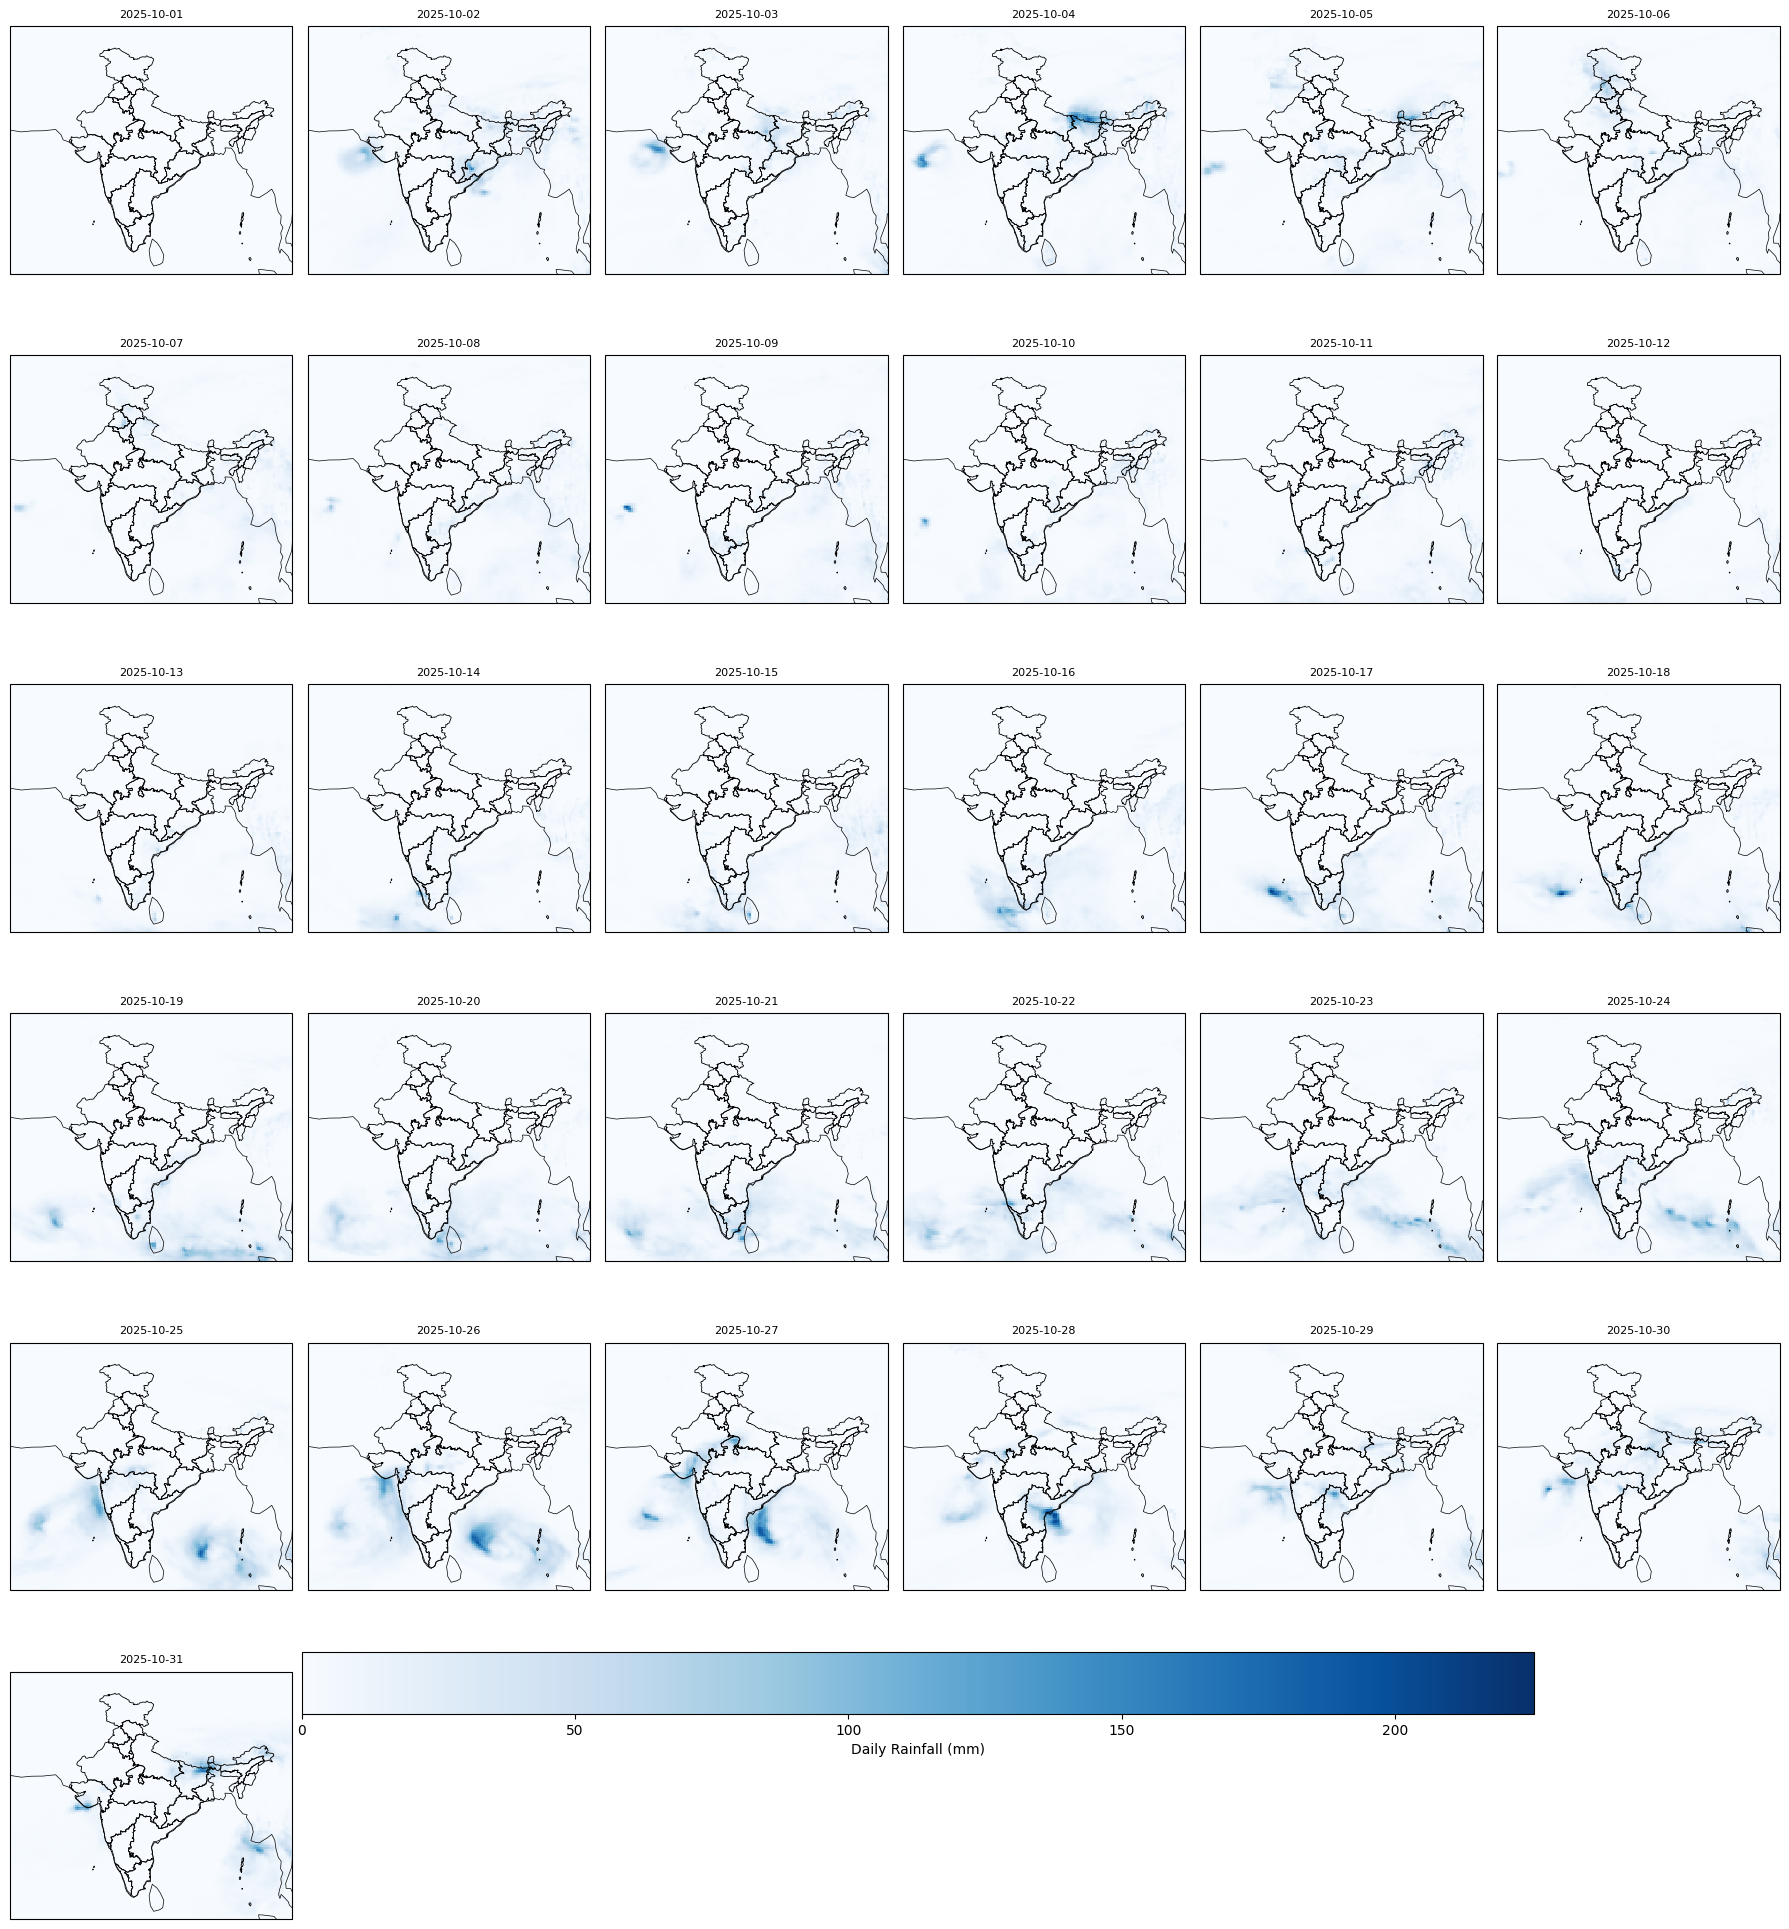

In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# =====================================================
# USER SETTINGS
# =====================================================

data_dir = "/home/nilay/SSD Data Downloads/ERA5 October Hourly Unziped"
india_shp = "//media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

# region box
lat_min, lat_max = 5, 40
lon_min, lon_max = 60, 100

# =====================================================
# LOAD DATA
# =====================================================

files = sorted(glob.glob(f"{data_dir}/*.nc"))

ds = xr.open_mfdataset(
    files,
    combine="by_coords",
    engine="netcdf4"
)

# subset region
ds = ds.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

# =====================================================
# DAILY TOTAL RAINFALL
# ERA5 tp is meters → convert to mm
# =====================================================

rain = ds["tp"] * 1000
daily = rain.resample(valid_time="1D").sum()

# =====================================================
# COLOR SCALE (uniform)
# =====================================================

vmax = float(daily.max())

# =====================================================
# PLOTTING
# =====================================================

fig = plt.figure(figsize=(18, 20))

proj = ccrs.PlateCarree()

shape_feature = cfeature.ShapelyFeature(
    shpreader.Reader(india_shp).geometries(),
    proj,
    edgecolor="black",
    facecolor="none",
    linewidth=0.6
)

for i, day in enumerate(daily.valid_time):

    ax = plt.subplot(6, 6, i+1, projection=proj)

    im = ax.pcolormesh(
        daily.longitude,
        daily.latitude,
        daily.sel(valid_time=day),
        cmap="Blues",
        vmin=0,
        vmax=vmax,
        shading="auto"
    )

    ax.add_feature(cfeature.COASTLINE.with_scale("110m"), linewidth=0.5)
    ax.add_feature(shape_feature)

    ax.set_title(str(day.values)[:10], fontsize=8)

# colorbar
cbar = fig.colorbar(
    im,
    ax=fig.axes,
    orientation="horizontal",
    fraction=0.04,
    pad=0.03
)

cbar.set_label("Daily Rainfall (mm)")

plt.tight_layout()
plt.show()


# Precentile colorbar=>

/tmp/ipykernel_81672/2437555292.py:26: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'valid_time' ('valid_time',) The recommendation is to set join explicitly for this case.
  ds = xr.open_mfdataset(
/tmp/ipykernel_81672/2437555292.py:26: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds = xr.open_mfdataset(
/tmp/ipykernel_81672/2437555292.py:26: FutureWarning: In a future version of xarray the default value for compat will 

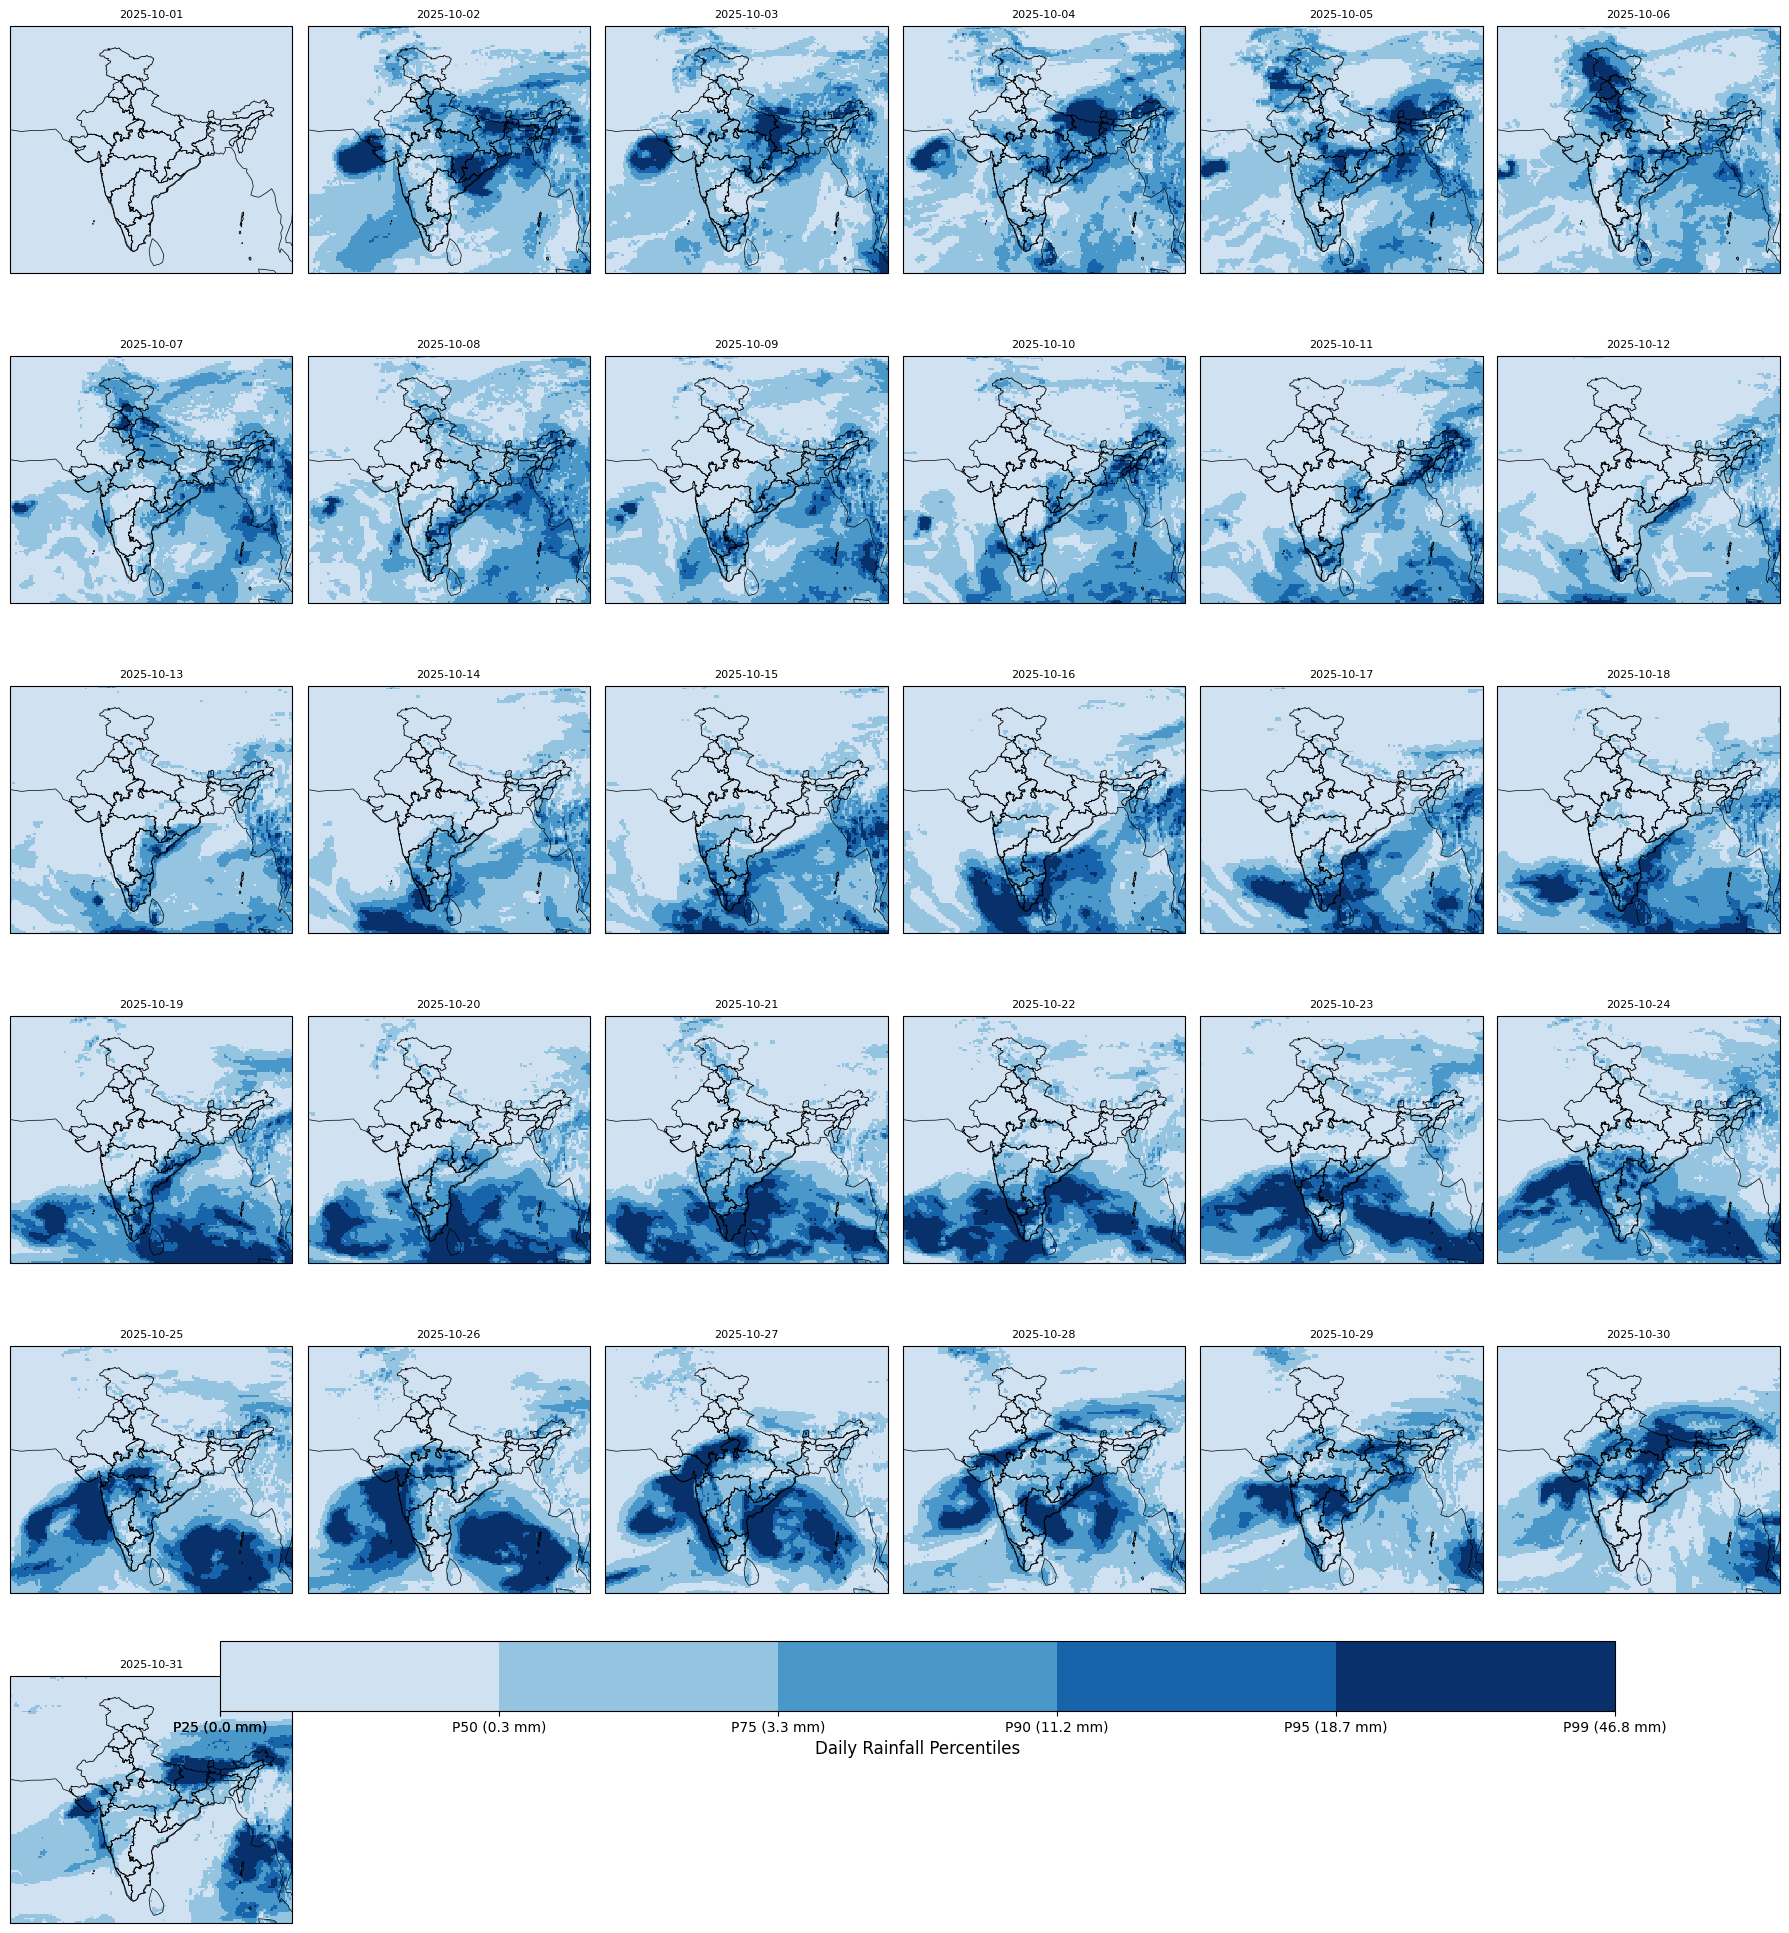

In [2]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# =====================================================
# USER SETTINGS
# =====================================================

data_dir = "/home/nilay/SSD Data Downloads/ERA5 October Hourly Unziped"
india_shp = "/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lat_min, lat_max = 5, 40
lon_min, lon_max = 60, 100

# =====================================================
# LOAD DATA
# =====================================================

files = sorted(glob.glob(f"{data_dir}/*.nc"))

ds = xr.open_mfdataset(
    files,
    combine="by_coords",
    engine="netcdf4"
)

# subset region
ds = ds.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

# =====================================================
# DAILY TOTAL RAINFALL (mm)
# =====================================================

rain = ds["tp"] * 1000
daily = rain.resample(valid_time="1D").sum()

# =====================================================
# PERCENTILE COLOR SCALING
# =====================================================

vals = daily.values.flatten()
vals = vals[~np.isnan(vals)]

percentiles = [5, 25, 50, 75, 90, 95, 99]
pvals = np.percentile(vals, percentiles)

norm = mcolors.BoundaryNorm(
    pvals,
    ncolors=plt.cm.Blues.N,
    clip=True
)

# =====================================================
# PLOTTING SETUP
# =====================================================

fig = plt.figure(figsize=(18, 20))
proj = ccrs.PlateCarree()

shape_feature = cfeature.ShapelyFeature(
    shpreader.Reader(india_shp).geometries(),
    proj,
    edgecolor="black",
    facecolor="none",
    linewidth=0.6
)

# =====================================================
# PLOT DAILY MAPS
# =====================================================

for i, day in enumerate(daily.valid_time):

    ax = plt.subplot(6, 6, i+1, projection=proj)

    im = ax.pcolormesh(
        daily.longitude,
        daily.latitude,
        daily.sel(valid_time=day),
        cmap="Blues",
        norm=norm,
        shading="auto"
    )

    ax.add_feature(cfeature.COASTLINE.with_scale("110m"), linewidth=0.5)
    ax.add_feature(shape_feature)

    ax.set_title(str(day.values)[:10], fontsize=8)

# =====================================================
# COLORBAR WITH PERCENTILE LABELS
# =====================================================

labels = [
    f"P{p} ({v:.1f} mm)"
    for p, v in zip(percentiles, pvals)
]

cbar = fig.colorbar(
    im,
    ax=fig.axes,
    orientation="horizontal",
    fraction=0.05,
    pad=0.04
)

cbar.set_ticks(pvals)
cbar.set_ticklabels(labels)
cbar.set_label("Daily Rainfall Percentiles", fontsize=12)

plt.tight_layout()
plt.show()


# Manual ticks in the colorbar=>

# 

/tmp/ipykernel_81672/61553281.py:33: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'valid_time' ('valid_time',) The recommendation is to set join explicitly for this case.
  ds = xr.open_mfdataset(files, combine="by_coords", engine="netcdf4")
/tmp/ipykernel_81672/61553281.py:33: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds = xr.open_mfdataset(files, combine="by_coords", engine="netcdf4")
/tmp/ipykernel_81672/61553281.py

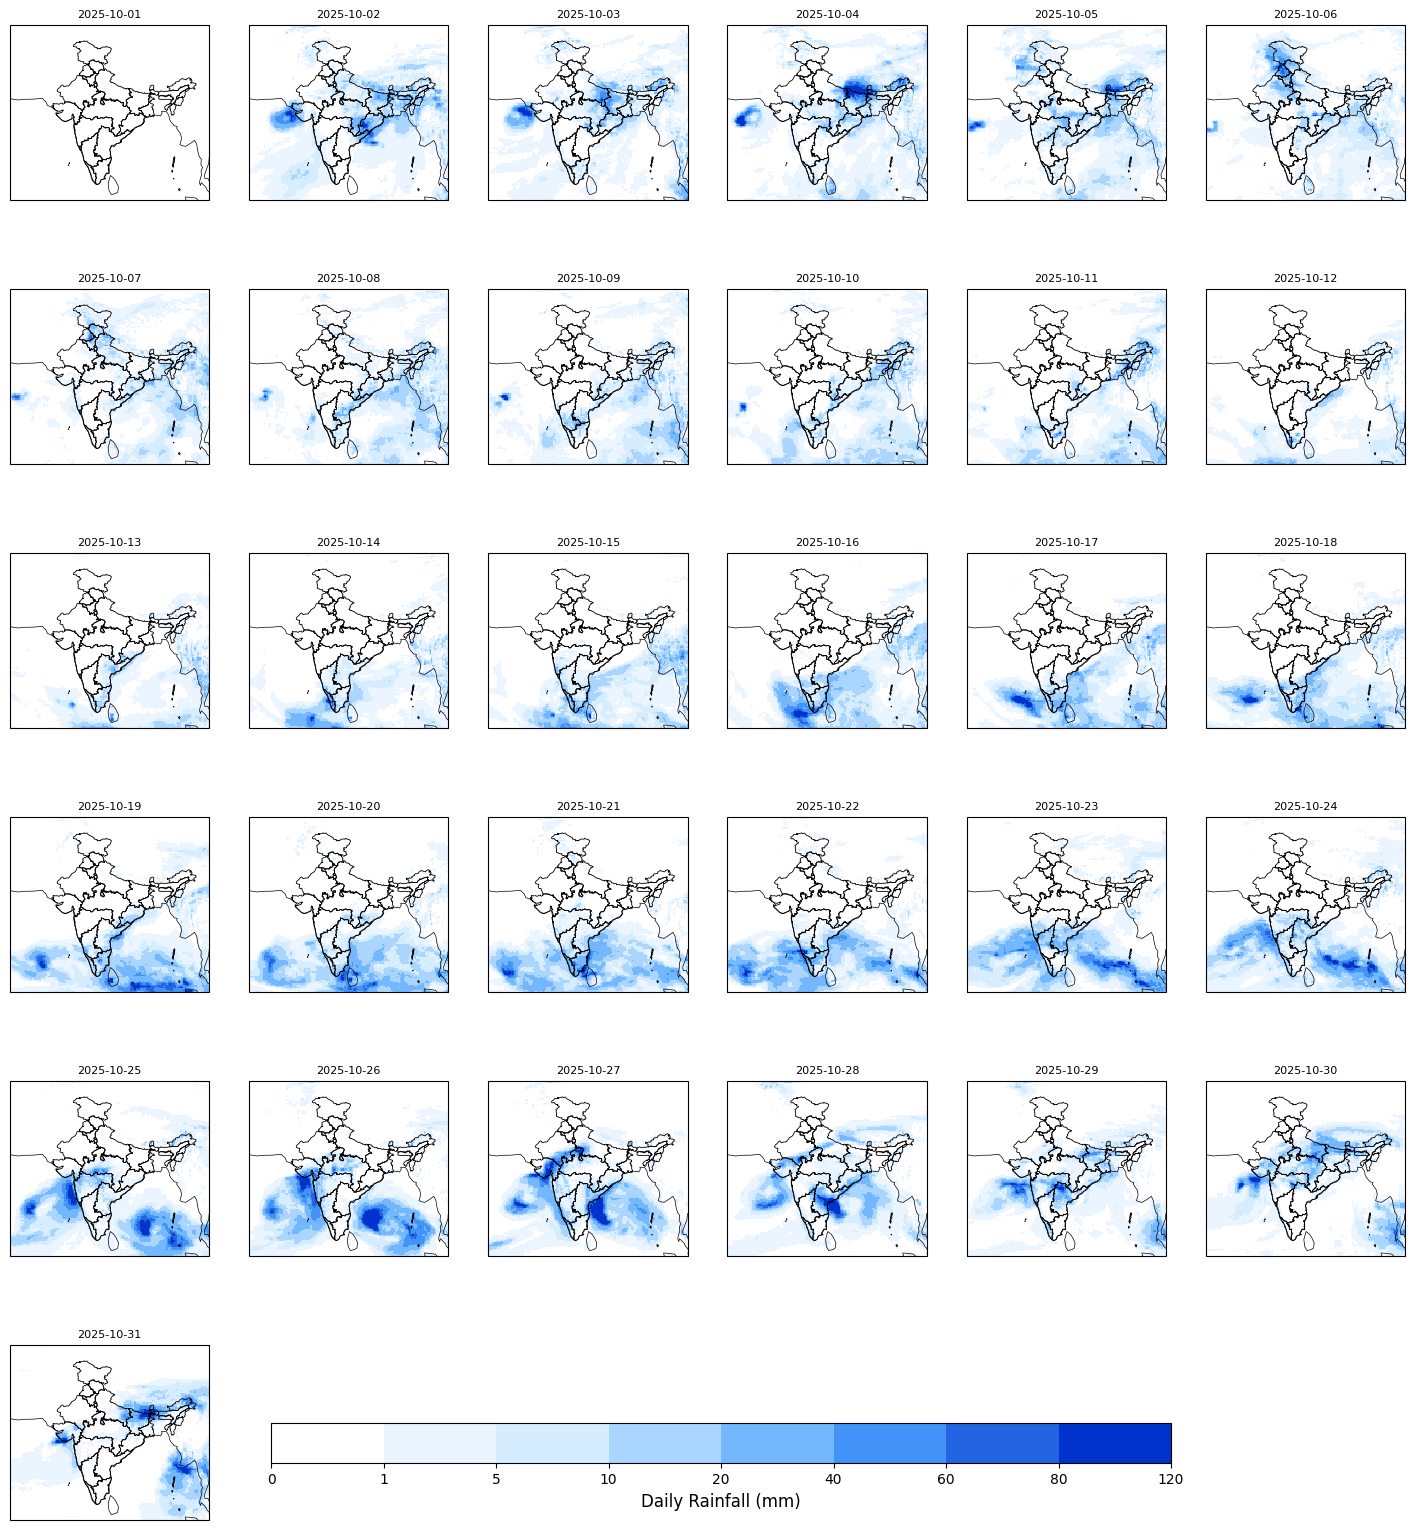

In [8]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# =====================================================
# USER SETTINGS
# =====================================================

data_dir = "/home/nilay/SSD Data Downloads/ERA5 October Hourly Unziped"
india_shp = "/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lat_min, lat_max = 5, 40
lon_min, lon_max = 60, 100

# rainfall levels (mm)
levels = [0, 1, 5, 10, 20, 40, 60, 80, 120]

# 🔥 COLORBAR POSITION CONTROL
# [left, bottom, width, height]
colorbar_position = [0.27, 0.15, 0.5, 0.02]

# =====================================================
# LOAD DATA
# =====================================================

files = sorted(glob.glob(f"{data_dir}/*.nc"))

ds = xr.open_mfdataset(files, combine="by_coords", engine="netcdf4")

ds = ds.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

rain = ds["tp"] * 1000
daily = rain.resample(valid_time="1D").sum()

# =====================================================
# COLOR SETTINGS
# =====================================================

white_blue = mcolors.LinearSegmentedColormap.from_list(
    "white_blue",
    ["#ffffff", "#cfe8ff", "#4da3ff", "#0033cc"]
)

norm = mcolors.BoundaryNorm(levels, white_blue.N, clip=True)

# =====================================================
# PLOTTING
# =====================================================

fig = plt.figure(figsize=(18, 20))
proj = ccrs.PlateCarree()

shape_feature = cfeature.ShapelyFeature(
    shpreader.Reader(india_shp).geometries(),
    proj,
    edgecolor="black",
    facecolor="none",
    linewidth=0.6
)

for i, day in enumerate(daily.valid_time):

    ax = plt.subplot(6, 6, i+1, projection=proj)

    im = ax.pcolormesh(
        daily.longitude,
        daily.latitude,
        daily.sel(valid_time=day),
        cmap=white_blue,
        norm=norm,
        shading="auto"
    )

    ax.add_feature(cfeature.COASTLINE.with_scale("110m"), linewidth=0.5)
    ax.add_feature(shape_feature)

    ax.set_title(str(day.values)[:10], fontsize=8)

# =====================================================
# USER-CONTROLLED COLORBAR
# =====================================================

cax = fig.add_axes(colorbar_position)

cbar = fig.colorbar(im, cax=cax, orientation="horizontal")

cbar.set_ticks(levels)
cbar.set_label("Daily Rainfall (mm)", fontsize=12)

plt.show()
